In [7]:
import numpy as np
from loguru import logger
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scienceplots
# plt.figure(figsize=(10, 6))


# plt.style.use('science')
plt.style.use(['science','no-latex'])

data = pd.read_csv("BTC-USD.csv")
logger.info(data)


2023-10-22 01:17:15.321 | INFO     | __main__:<module>:14 -            Date          Open          High           Low         Close  \
0    2022-10-19  19335.027344  19348.416016  19127.687500  19139.535156   
1    2022-10-20  19138.085938  19315.199219  18971.458984  19053.740234   
2    2022-10-21  19053.203125  19237.384766  18770.970703  19172.468750   
3    2022-10-22  19172.380859  19248.068359  19132.244141  19208.189453   
4    2022-10-23  19207.734375  19646.652344  19124.197266  19567.007813   
..          ...           ...           ...           ...           ...   
361  2023-10-15  26858.011719  27289.169922  26817.894531  27159.652344   
362  2023-10-16  27162.628906  29448.138672  27130.472656  28519.466797   
363  2023-10-17  28522.097656  28618.751953  28110.185547  28415.748047   
364  2023-10-18  28413.531250  28889.009766  28174.251953  28328.341797   
365  2023-10-19  28308.337891  28882.351563  28202.761719  28635.406250   

        Adj Close       Volume  
0    1

In [8]:
time = np.array(data["Date"])
openPrice = np.array(data["Open"])

<IPython.core.display.Javascript object>

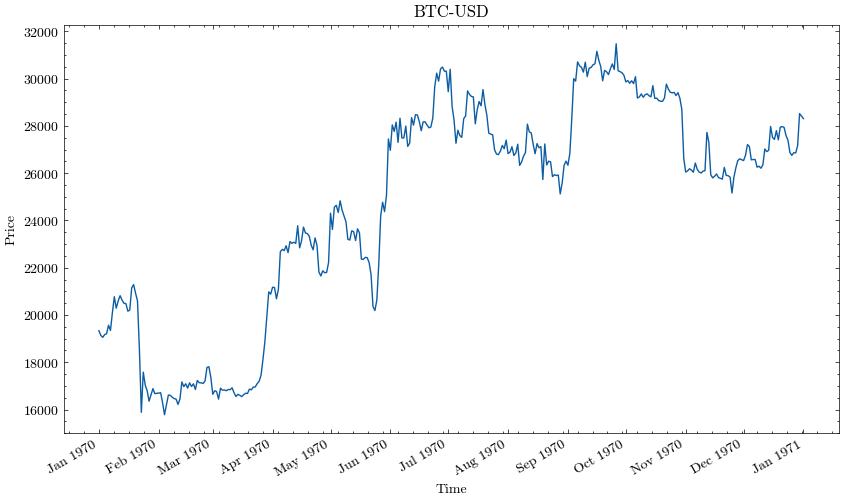

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(time, openPrice)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('BTC-USD')

plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()
# 旋转标签以提高可读性
plt.show()



In [10]:
from sklearn.model_selection import train_test_split
data['Date'] = pd.to_datetime(data['Date'])
# 提取日期时间数据的数值特征（例如，使用日期距离某个基准日期的天数）
data['days_since_base'] = (data['Date'] - pd.to_datetime('1970-01-01')).dt.days
X = data[['days_since_base']]
y = data['Open']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)


In [11]:
X_train=X_train.to_numpy().reshape(-1,1) #将训练数据特征转换成二维数组XX行*1列
X_test=X_test.to_numpy().reshape(-1,1)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
poly_reg = linreg.fit(X_train, y_train)


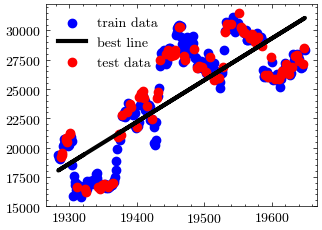

In [12]:
plt.scatter(X_train, y_train, color='blue', label="train data")
y_train_pred = linreg.predict(X_train)
#绘制最佳拟合线：标签用的是训练数据的预测值y_train_pred
plt.plot(X_train, y_train_pred, color='black', linewidth=3, label="best line")
plt.scatter(X_test, y_test, color='red', label="test data")
plt.legend(loc=2)

#lstm gru
# 


In [13]:

a=linreg.intercept_

b=linreg.coef_
print("intercept",a,",regression parameter",b)


# Create a new data 
new_date = pd.to_datetime('2023-10-18')
days_since_base_new = (new_date - pd.to_datetime('1970-01-01')).days
X_test_Pre = np.array(days_since_base_new).reshape(-1,1)
y_test_pred = linreg.predict(X_test_Pre)
y_test_real = data['Open'][data['Date'] == '2023-10-18'].values[0]

print("Predicted price: ", y_test_pred[0])
print("Real price: ", y_test_real)
print(linreg.score(X_test, y_test))






intercept -670082.613430563 ,regression parameter [35.68386248]
Predicted price:  31033.916632133536
Real price:  28413.53125
0.5543178144228862


In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from tqdm.std import trange
X = data[['days_since_base']]
y = data['Open']
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(X)





In [15]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
y_pred = lin_reg.predict(x_poly)

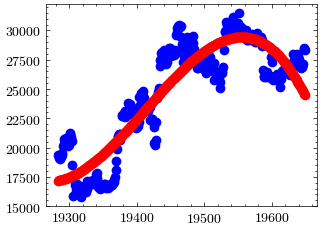

In [16]:
plt.scatter(X, y, color='blue')
plt.scatter(X, y_pred, color='red')
plt.show()

In [17]:
def make_polynomial(X, degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    return poly_features.fit_transform(X)

cv = KFold(n_splits=300)
reg = LinearRegression()

max_poly_order = 20
avg_losses = []

for poly_order in trange(1, max_poly_order + 1):
    X_train = make_polynomial(X, poly_order)
    losses = []
    for train_index, test_index in cv.split(X_train):
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]
        reg.fit(X_train_cv, y_train_cv)
        losses.append(np.mean((y_test_cv - reg.predict(X_test_cv))**2))
    avg_losses.append(np.mean(losses))

# 找到平均损失最小的多项式次数
best_order = np.argmin(avg_losses) + 1
print('Best polynomial degree:', best_order)

100%|██████████| 20/20 [00:03<00:00,  5.81it/s]

Best polynomial degree: 3


100%|██████████| 20/20 [00:03<00:00,  6.34it/s]


[8217068.941664963, 4415241.5109806955, 3896746.7570204614, 3905596.3121999796, 3908889.7154708845, 3914849.3425105414, 3920732.5046296916, 3926538.72447422, 3932267.1585114305, 3937917.044145845, 3943487.505654967, 3948977.8081190437, 3954387.152757562, 3959714.7607518635, 3964959.882899399, 3970121.870714046, 3975199.837472516, 3980193.3129408336, 3985101.477345552, 3989923.7147987923]
3896746.7570204614


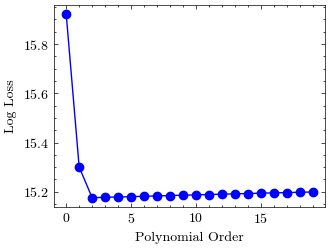

In [18]:
cv = KFold(n_splits=300)
reg = LinearRegression()
all_loss = []

for i in trange(1,max_poly_order+1):  # 1st for loop over polynomial orders
    poly_order = i
    X_train = make_polynomial(X, poly_order)
    loss_at_order = []
    for train_index, test_index in cv.split(X_train): # 2nd for loop for cross-validation
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]
        reg.fit(X_train_cv, y_train_cv)
        loss_at_order.append(np.mean((y_test_cv - reg.predict(X_test_cv))**2)) # collect loss at fold
    all_loss.append(np.mean(loss_at_order)) # collect loss at order
print(all_loss)
print(all_loss[np.argmin(all_loss)]) # find the order with lowest loss
plt.plot(np.log(all_loss), 'bo-') # plot log(loss) at order
plt.xlabel('Polynomial Order') # always label x&y-axis
plt.ylabel('Log Loss') # always label x&y-axis
plt.show()

In [23]:
from sklearn.metrics import r2_score
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
y_pred = lin_reg.predict(x_poly)
r2 = r2_score(y, y_pred)
print(f"R^2 value for polynomial order 3: {r2:.4f}")

R^2 value for polynomial order 3: 0.8160


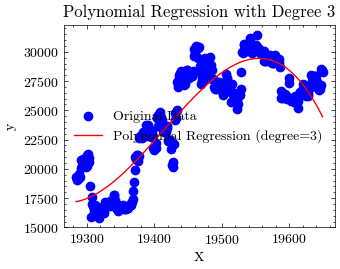

In [24]:
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# 训练线性回归模型
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# 预测数据点
y_pred = lin_reg.predict(X_poly)

# 绘制原始数据点和预测的多项式曲线
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', label='Polynomial Regression (degree=3)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression with Degree 3')
plt.show()

In [25]:
# 计算2023-10-20距离1970-01-01的天数
date_to_predict = pd.to_datetime('2023-10-19')
days_since_base_to_predict = (date_to_predict - pd.to_datetime('1970-01-01')).days

# 使用3次多项式转换这个数值特征
# 使用Pandas DataFrame并确保列名称与原始数据相同
X_to_predict = pd.DataFrame({'days_since_base': [days_since_base_to_predict]})
X_poly_to_predict = poly_features.transform(X_to_predict)

# 使用已经训练好的模型进行预测
y_pred_for_date = lin_reg.predict(X_poly_to_predict)

# 根据y_pred_for_date的形状正确地访问其值
if y_pred_for_date.shape == (1, 1):
    predicted_value = y_pred_for_date[0][0]
else:
    predicted_value = y_pred_for_date[0]

print(f"Predicted value for 2023-10-19: {predicted_value}")
print(f"Real value for 2023-10-19: {data['Open'][data['Date'] == '2023-10-19'].values[0]}")

Predicted value for 2023-10-19: 24455.029076576233
Real value for 2023-10-19: 28308.337891
